<a href="https://colab.research.google.com/github/abhiraman/Capstone_Project/blob/main/NetFlix_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Date Inferencing & Visualization - NetFlix
Dataset - https://www.kaggle.com/shivamb/netflix-shows

Visualization Tool - Plotly

Libraries - Pandas, os, plotly


Data Cleaning

In [393]:
import pandas as pd
import numpy as np
import os

In [394]:
from google.colab import files

In [395]:
data_flag = False
for dirs,subdirs,filess in list(os.walk('./')):
  for efile in filess:
    if efile == 'netflix_titles.csv':
      data_flag = True
      break

In [396]:
if not data_flag:
  uploaded  = files.upload()

In [397]:
!ls

netflix_titles.csv  sample_data


In [398]:
df = pd.read_csv("/content/netflix_titles.csv")

In [399]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [400]:
del df['show_id']
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [401]:
# Analyzing NaN Values in each attribute of the Data Set 
def _analyze_NaNs(df):
  for eCol in df:
    print("- {} : {} ".format(eCol,df[eCol].isnull().sum()))
_analyze_NaNs(df)

- type : 0 
- title : 0 
- director : 2389 
- cast : 718 
- country : 507 
- date_added : 10 
- release_year : 0 
- rating : 7 
- duration : 0 
- listed_in : 0 
- description : 0 


In [402]:
## Nan of ratings replcaced with most recurring rating
df['rating'] = df['rating'].fillna(value = df['rating'].value_counts().idxmax())

## Nan value of directors as "Unknown"
df["director"] = df["director"].fillna('Unknown')

## Nan Value of Casr as 'Unknown'
df["cast"] = df["cast"].fillna('Unknown')

## Nan value of countries to 'Others'
df["country"] = df["country"].fillna('Others')

## Removing rows where Date Added in Nan
df.dropna(subset = ['date_added'],inplace=True)

In [403]:
_analyze_NaNs(df) ## data cleaned !

- type : 0 
- title : 0 
- director : 0 
- cast : 0 
- country : 0 
- date_added : 0 
- release_year : 0 
- rating : 0 
- duration : 0 
- listed_in : 0 
- description : 0 


In [404]:
def fix_country_col(data):
    new_col = []
    for row in data["country"]:
      new_col.append(row.split(","))
    return new_col

def fix_cast_col(data):
  new_col = []
  for  row in data["cast"]:
    new_col.append(row.split(','))
  return new_col

def fix_listed_in_col(data):
  new_col = []
  for row in data["listed_in"]:
    new_col.append(row.split(','))
  return new_col

In [405]:
df['country'] = fix_country_col(df)

In [406]:
df['cast'] = fix_cast_col(df)
df['listed_in'] = fix_listed_in_col(df)

In [407]:
## Convert Date Added from dd-mm-yyyy format to only yyyy format
df['date_added'] = [eString.split(',')[-1] for eString in df['date_added']]

In [408]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],2020,2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],2016,2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],2018,2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],2017,2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],2020,2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


# Q1 What are the types of content available on Netflix? 

In [409]:
import plotly.express as px

In [410]:
bli = px.pie(data_frame=df,names='type',title="% of Content Available on NetFlix",hover_data = ['type'])
bli.show()

# Q2 Genre Analysis

In [411]:
!pip install -Uqq ipdb
import ipdb 

def _get_genre_categories_its_counts(df):
  category_dict = {}
  for eCategoryList in df['listed_in']:
    for eCategory in eCategoryList:
      eCategory = eCategory.strip()
      if eCategory in list(category_dict.keys()):
        count = category_dict.get(eCategory)
        count+=1
        category_dict[eCategory] = count
      else:
        category_dict[eCategory] = 1

  print(category_dict)
  return pd.DataFrame([category_dict.keys(),category_dict.values()])

genre_count_df = _get_genre_categories_its_counts(df)

{'International TV Shows': 1198, 'TV Dramas': 703, 'TV Sci-Fi & Fantasy': 75, 'Dramas': 2106, 'International Movies': 2437, 'Horror Movies': 312, 'Action & Adventure': 721, 'Independent Movies': 673, 'Sci-Fi & Fantasy': 218, 'TV Mysteries': 90, 'Thrillers': 491, 'Crime TV Shows': 426, 'Docuseries': 352, 'Documentaries': 786, 'Sports Movies': 196, 'Comedies': 1471, 'Anime Series': 147, 'Reality TV': 222, 'TV Comedies': 518, 'Romantic Movies': 531, 'Romantic TV Shows': 333, 'Science & Nature TV': 85, 'Movies': 56, 'British TV Shows': 231, 'Korean TV Shows': 150, 'Music & Musicals': 321, 'LGBTQ Movies': 90, 'Faith & Spirituality': 57, "Kids' TV": 412, 'TV Action & Adventure': 149, 'Spanish-Language TV Shows': 146, 'Children & Family Movies': 532, 'TV Shows': 12, 'Classic Movies': 103, 'Cult Movies': 59, 'TV Horror': 69, 'Stand-Up Comedy & Talk Shows': 52, 'Teen TV Shows': 60, 'Stand-Up Comedy': 329, 'Anime Features': 57, 'TV Thrillers': 50, 'Classic & Cult TV': 25}


In [412]:
genre_count_df.index = ["Genre","Count"]
genre_count_df = genre_count_df.transpose()

In [413]:
genre_count_df.head()

,Genre,Count
0,International TV Shows,1198
1,TV Dramas,703
2,TV Sci-Fi & Fantasy,75
3,Dramas,2106
4,International Movies,2437


In [414]:
fig = px.bar(genre_count_df,'Genre','Count', orientation='v',barmode='relative',title='Genre in NetFlix')
fig.show()


# Q3 How many contents published in countries 

In [415]:
## Create a Data Frame Having Country , Its Code & Counts 
def country_count(df):
  country_dict = {}
  for eCountryList in df['country']:
    for eCountry in eCountryList:
      eCountry = eCountry.strip(" ")
      if eCountry in list(country_dict.keys()):
        count = list(country_dict[eCountry].values())[0]
        countryCode = list(country_dict[eCountry].keys())[0]
        count+=1
        country_dict[eCountry][countryCode] = count

      else:
        splitWord = eCountry.split(' ')
        if len(splitWord)>1:
          countryCode = splitWord[0][0]+splitWord[1][0]
        else:
          countryCode = splitWord[0][:3]
        country_dict.setdefault(eCountry,{}).setdefault(countryCode,1)
  countries = list(country_dict.keys())
  countryCode = [k for eDict in list(country_dict.values()) for k,v in eDict.items()]
  counts = [v for eDict in list(country_dict.values()) for k,v in eDict.items()]
  return pd.DataFrame({"Country":countries,
                       "CountryCode":countryCode,
                       "Count":counts})



In [416]:
country_count_df = country_count(df)

In [417]:
country_count_df['Count']

0        88
1       154
2        39
3      3291
4       108
       ... 
114       1
115       1
116       1
117       1
118       1
Name: Count, Length: 119, dtype: int64

In [418]:
fig = px.bar(country_count_df,x="Country",y="Count")
fig.show()

# Q4 Most acted personality in NetFlix?

In [419]:
def _actor_its_counts(df):
  category_dict = {}
  for eCategoryList in df['cast']:
    for eCategory in eCategoryList:
      eCategory = eCategory.strip()
      if eCategory in list(category_dict.keys()):
        count = category_dict.get(eCategory)
        count+=1
        category_dict[eCategory] = count
      else:
        category_dict[eCategory] = 1
  return pd.DataFrame([category_dict.keys(),category_dict.values()])

In [420]:
actor_count_df = _actor_its_counts(df)

In [421]:
actor_count_df = actor_count_df.transpose()
actor_count_df.columns = ['Actor/Actress','Movie/Show Count']

In [422]:
actor_count_df = actor_count_df.sort_values('Movie/Show Count',ascending=False,inplace=False).drop([106])

In [423]:
actor_count_df = actor_count_df[0:21]

In [424]:
fig = px.funnel(actor_count_df, x='Movie/Show Count', y='Actor/Actress',color='Movie/Show Count')
fig.show()

# Q5 Density Plot for Movie Duration

In [425]:
df_movies = df[df['type']=='Movie']
df_movies['duration'] = df_movies['duration'].str.replace('min','')
df_movies['duration'] = df_movies['duration'].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



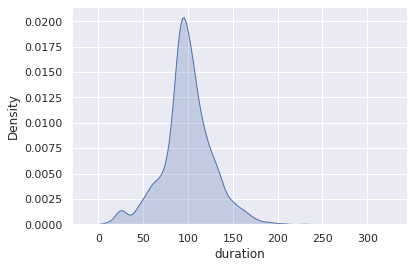

In [426]:
import seaborn as sns

sns.set(style="darkgrid")
sns.kdeplot(data=df_movies['duration'], shade=True)

# Q6 YOY - which type (Movies or Shows) being added by NetFlix?

In [427]:
import plotly.graph_objects as go

In [428]:
movies = df[df["type"]=="Movie"]['date_added'].value_counts().rename("count").reset_index()
tv_shows = df[df["type"]=="TV Show"]['date_added'].value_counts().rename('count').reset_index()

In [429]:
# sorting by years
movies = movies.sort_values(by="index")
tv_shows = tv_shows.sort_values(by="index")
print(movies)

    index  count
13   2008      1
11   2009      2
12   2010      1
8    2011     13
10   2012      3
9    2013      6
7    2014     19
6    2015     58
4    2016    258
3    2017    864
2    2018   1255
0    2019   1497
1    2020   1312
5    2021     88


In [430]:
trace1 = go.Bar(x=movies['index'], 
                    y=movies['count'],
                    name="Movies",
                    marker_color='MediumPurple')
trace2 = go.Bar(x=tv_shows['index'], 
                    y=tv_shows['count'],
                    name="TV Shows",
                    marker_color='DarkSlateGrey')
layout = go.Layout(title="Number of content additions by years", height=500)
fig = go.Figure([trace1,trace2], layout=layout)
fig.update_layout( xaxis = go.layout.XAxis( tickangle = 30) )
fig.update_xaxes(tickvals=movies["index"])

#fig.update_layout( xaxis = bb )
fig.show()